In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_pairs = [
    ('logline-origin.txt', 'logline-final.txt'),
    ('character-origin.txt', 'character-final.txt'),
    ('plots-origin.txt', 'plots-final.txt'),
    ('dialogue-origin.txt', 'dialogue-final.txt'),
    ('scene-origin.txt', 'scene-final.txt')
]

In [3]:
def get_file_length(file_name):
    if os.path.exists(file_name):
        with open(file_name, 'r', encoding='utf-8') as f:
            content = f.read()
            return len(content)
    else:
        print(f'{file_name}不存在')
        return 0

In [4]:
# 计算差异
differences = []
origin_lengths = []

for origin, final in file_pairs:
    len_origin = get_file_length(origin)
    len_final = get_file_length(final)
    diff = abs(len_final - len_origin)
    differences.append(diff)
    origin_lengths.append(len_origin)

# 计算MAD
mad = np.mean(differences)

# 计算平均原始文件长度
mean_origin_length = np.mean(origin_lengths)

# 标准化差异
normalized_differences = [diff / mean_origin_length for diff in differences]
print(normalized_differences)

[np.float64(0.0031964200095892597), np.float64(0.021575835064727503), np.float64(0.08630334025891001), np.float64(0.08150871024452612), np.float64(0.043151670129455005)]


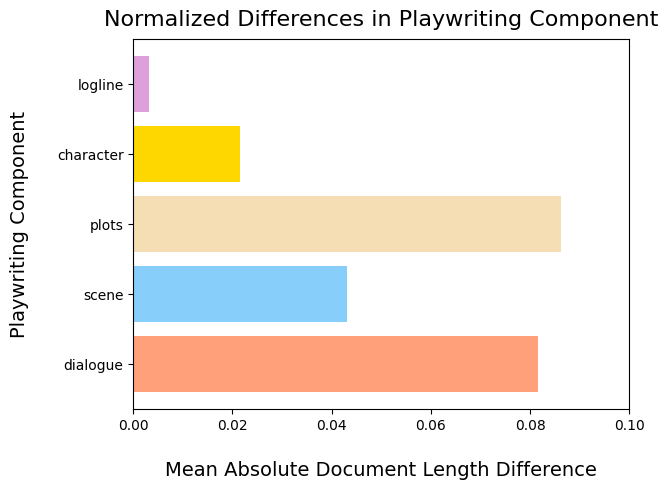

In [8]:
labels = [origin.split('-')[0] for origin, _ in file_pairs]
category_order = ['logline', 'character', 'plots', 'scene', 'dialogue']
colors = ['lightsalmon', 'lightskyblue', 'wheat', 'gold', 'plum']

# 创建DataFrame并设置类别顺序
df = pd.DataFrame({'labels': labels, 'differences': normalized_differences})
df['labels'] = pd.Categorical(df['labels'], categories=category_order, ordered=True)

# 按照指定顺序排序
df = df.sort_values('labels',ascending=False)

plt.barh(df['labels'], df['differences'], color=colors)
plt.xlabel('Mean Absolute Document Length Difference',fontsize=14, labelpad=20)
plt.ylabel('Playwriting Component',fontsize=14, labelpad=20)
plt.title('Normalized Differences in Playwriting Component',fontsize=16,pad=10)
plt.xlim(0, 0.1)
plt.show()